<a href="https://colab.research.google.com/github/Ad-Chekk/ML_models/blob/main/N_armed_bandit_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rewards for arm 0: [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
Rewards for arm 1: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

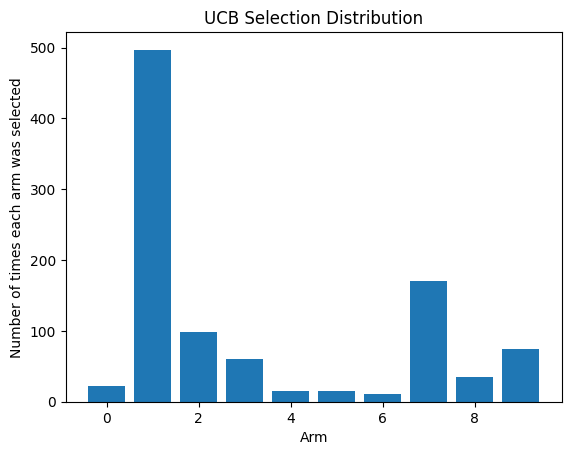

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating the multi-armed bandit environment
np.random.seed(42)
num_arms = 10
num_rounds = 1000
true_rewards = np.random.rand(num_arms)  # True mean rewards of each arm

# Initialize counts and rewards
counts = np.zeros(num_arms)  # Number of times each arm is selected
total_rewards = np.zeros(num_arms)  # Total reward from each arm
chosen_arms = []
all_rewards = [[] for _ in range(num_arms)]  # Store rewards for each arm

# Running UCB Algorithm
for t in range(1, num_rounds + 1):
    ucb_values = []
    for arm in range(num_arms):
        if counts[arm] == 0:
            ucb_values.append(float('inf'))  # Ensure each arm is selected at least once
        else:
            avg_reward = total_rewards[arm] / counts[arm]
            confidence = np.sqrt((2 * np.log(t)) / counts[arm])
            ucb_values.append(avg_reward + confidence)

    selected_arm = np.argmax(ucb_values)
    reward = np.random.binomial(1, true_rewards[selected_arm])  # Simulated reward

    # Update statistics
    counts[selected_arm] += 1
    total_rewards[selected_arm] += reward
    all_rewards[selected_arm].append(reward)
    chosen_arms.append(selected_arm)

# Display all rewards for each arm
for arm in range(num_arms):
    print(f"Rewards for arm {arm}: {all_rewards[arm]}")

# Plot the selection frequency
plt.bar(range(num_arms), counts)
plt.xlabel("Arm")
plt.ylabel("Number of times each arm was selected")
plt.title("UCB Selection Distribution")
plt.show()

    Arm 0  Arm 1 Arm 2 Arm 3 Arm 4 Arm 5 Arm 6 Arm 7 Arm 8 Arm 9
0     0.0      0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0
1     0.0      1   1.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0
2     1.0      1   1.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0
3     0.0      1   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0
4     0.0      1   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0
..    ...    ...   ...   ...   ...   ...   ...   ...   ...   ...
492            1                                                
493            1                                                
494            1                                                
495            1                                                
496            1                                                

[497 rows x 10 columns]


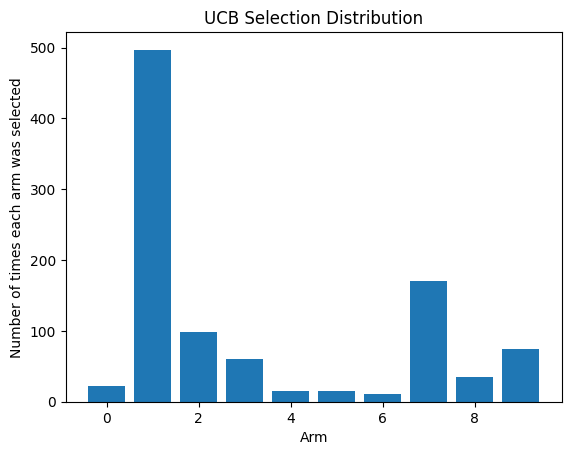

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating the multi-armed bandit environment
np.random.seed(42)
num_arms = 10
num_rounds = 1000
true_rewards = np.random.rand(num_arms)  # True mean rewards of each arm

# Initialize counts and rewards
counts = np.zeros(num_arms)  # Number of times each arm is selected
total_rewards = np.zeros(num_arms)  # Total reward from each arm
chosen_arms = []
all_rewards = [[] for _ in range(num_arms)]  # Store rewards for each arm

# Running UCB Algorithm
for t in range(1, num_rounds + 1):
    ucb_values = []
    for arm in range(num_arms):
        if counts[arm] == 0:
            ucb_values.append(float('inf'))  # Ensure each arm is selected at least once
        else:
            avg_reward = total_rewards[arm] / counts[arm]
            confidence = np.sqrt((2 * np.log(t)) / counts[arm])
            ucb_values.append(avg_reward + confidence)

    selected_arm = np.argmax(ucb_values)
    reward = np.random.binomial(1, true_rewards[selected_arm])  # Simulated reward

    # Update statistics
    counts[selected_arm] += 1
    total_rewards[selected_arm] += reward
    all_rewards[selected_arm].append(reward)
    chosen_arms.append(selected_arm)

# Create a DataFrame to display numerical tabular values
reward_data = {f"Arm {i}": all_rewards[i] for i in range(num_arms)}
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in reward_data.items()]))
print(df.fillna(''))  # Display tabular values with NaN replaced by empty strings

# Plot the selection frequency
plt.bar(range(num_arms), counts)
plt.xlabel("Arm")
plt.ylabel("Number of times each arm was selected")
plt.title("UCB Selection Distribution")
plt.show()


    Arm 0  Arm 1 Arm 2 Arm 3 Arm 4 Arm 5 Arm 6 Arm 7 Arm 8 Arm 9
0     0.0      0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0
1     0.0      1   1.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0
2     1.0      1   1.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0
3     0.0      1   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0
4     0.0      1   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0
..    ...    ...   ...   ...   ...   ...   ...   ...   ...   ...
492            1                                                
493            1                                                
494            1                                                
495            1                                                
496            1                                                

[497 rows x 10 columns]


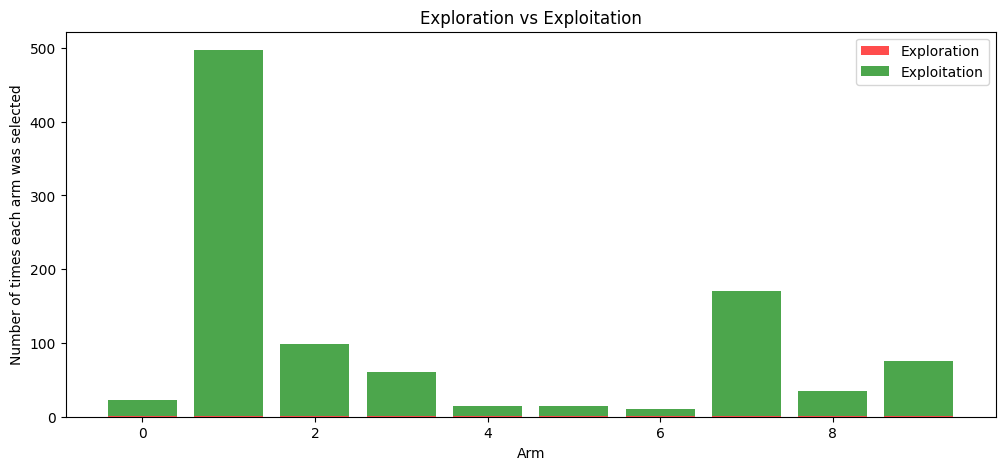

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulating the multi-armed bandit environment
np.random.seed(42)
num_arms = 10
num_rounds = 1000
true_rewards = np.random.rand(num_arms)  # True mean rewards of each arm

# Initialize counts and rewards
counts = np.zeros(num_arms)  # Number of times each arm is selected
total_rewards = np.zeros(num_arms)  # Total reward from each arm
chosen_arms = []
all_rewards = [[] for _ in range(num_arms)]  # Store rewards for each arm
exploration_counts = np.zeros(num_arms)  # Count of exploration actions
exploitation_counts = np.zeros(num_arms)  # Count of exploitation actions

# Running UCB Algorithm
for t in range(1, num_rounds + 1):
    ucb_values = []
    for arm in range(num_arms):
        if counts[arm] == 0:
            ucb_values.append(float('inf'))  # Ensure each arm is selected at least once
        else:
            avg_reward = total_rewards[arm] / counts[arm]
            confidence = np.sqrt((2 * np.log(t)) / counts[arm])
            ucb_values.append(avg_reward + confidence)

    selected_arm = np.argmax(ucb_values)
    reward = np.random.binomial(1, true_rewards[selected_arm])  # Simulated reward

    # Update statistics
    if counts[selected_arm] == 0:
        exploration_counts[selected_arm] += 1  # Count as exploration
    else:
        exploitation_counts[selected_arm] += 1  # Count as exploitation

    counts[selected_arm] += 1
    total_rewards[selected_arm] += reward
    all_rewards[selected_arm].append(reward)
    chosen_arms.append(selected_arm)

# Create a DataFrame to display numerical tabular values
reward_data = {f"Arm {i}": all_rewards[i] for i in range(num_arms)}
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in reward_data.items()]))
print(df.fillna(''))  # Display tabular values with NaN replaced by empty strings

# Plot exploration vs exploitation as two histograms
plt.figure(figsize=(12, 5))
plt.bar(range(num_arms), exploration_counts, color='red', alpha=0.7, label='Exploration')
plt.bar(range(num_arms), exploitation_counts, color='green', alpha=0.7, bottom=exploration_counts, label='Exploitation')
plt.xlabel("Arm")
plt.ylabel("Number of times each arm was selected")
plt.title("Exploration vs Exploitation")
plt.legend()
plt.show()
